<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/median%26%20hyperopt%20overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

In [5]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()


Saving lipo(Lables).csv to lipo(Lables) (1).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit (1).csv


In [184]:
import random
random.seed(1)
import pandas as pd
import io
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [186]:
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(data[data.isnull().any(axis=1)])

      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17   

      ('fr_sulfone', <class 'nu

In [187]:
data = data.drop(1561)
dataY = dataY.drop(1561)


In [188]:
arrayY = dataY.values
Y = arrayY[0: ,1 ]
array = data.values
X = array[0:,1:]

In [189]:
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))


[1.91136521e-01 7.15388169e-02 6.06704728e-02 5.28190071e-02
 4.51349968e-02 4.19253309e-02 3.37025058e-02 3.09939752e-02
 2.75239260e-02 2.53543263e-02 2.11356427e-02 2.08901061e-02
 1.79681315e-02 1.70744100e-02 1.57008353e-02 1.51151167e-02
 1.44776287e-02 1.38691265e-02 1.29503361e-02 1.20131171e-02
 1.17139452e-02 1.03653707e-02 9.96433763e-03 9.42805979e-03
 8.66937586e-03 8.46858769e-03 8.27547556e-03 7.63789466e-03
 7.26643719e-03 6.88556243e-03 6.55554088e-03 6.26780127e-03
 6.09224025e-03 5.71479822e-03 5.51579889e-03 5.16076808e-03
 4.94061462e-03 4.82801015e-03 4.55885684e-03 4.43905066e-03
 4.40373568e-03 4.20217426e-03 4.14405551e-03 3.85959887e-03
 3.71391514e-03 3.56548056e-03 3.38840355e-03 3.24772049e-03
 3.21009910e-03 3.03237787e-03 2.96257715e-03 2.89053142e-03
 2.83613561e-03 2.73132266e-03 2.68596490e-03 2.53836798e-03
 2.43390954e-03 2.30988011e-03 2.23855616e-03 2.09847696e-03
 2.07444666e-03 1.97565734e-03 1.92507812e-03 1.86870713e-03
 1.84743566e-03 1.732467

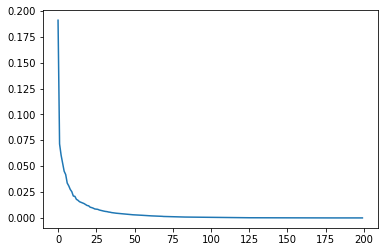

In [190]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()

In [191]:
pca = PCA(n_components=75)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)


In [192]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

(840, 75)
(840, 1)
(3359, 75)
(3359, 1)


In [193]:
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
print(Y_train_new.shape)
print(Y_test_new.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


(3359, 1)
(840, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [194]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [195]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [196]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [197]:
def load_data(data_dir=None):
    return trainset, testset

In [198]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(75, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [199]:
model = Net({})

In [200]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [201]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           7,600
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 27,901
Trainable params: 27,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.11
Estimated Total Size (MB): 0.11
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    7500    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

27901

In [202]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [203]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [204]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'memory': 8021375387.0, 'node:172.28.0.2': 1.0, 'object_store_memory': 4010687692.0, 'CPU': 2.0}


''

In [205]:
%%capture

%pip install hpbandster ConfigSpace
!pip install hpbandster ConfigSpace
!pip install bayesian-optimization

In [206]:
ray.shutdown()
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.schedulers import PopulationBasedTraining
ray.shutdown()
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.schedulers import PopulationBasedTraining
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([ 8,16, 32 , 64]),
        "hidden_dim1" : tune.quniform(120, 330, 15),
        "hidden_dim2" : tune.quniform(120, 330, 15),
        "hidden_dim3" : tune.quniform(120, 330, 15),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = HyperOptSearch(
    # space=config,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    n_initial_points=60,
    # gamma = 0.1,
    # random_state_seed=42,
    # points_to_evaluate=[{"max_norm_val": 2.5, 'GNN_Layers': 3, 'dropout': 0.25, 'dropout1': 0.35, 'dropout2': 0.15, 'lr': 0.001, 'hidden_size': 80, 'readout1_out': 150, 'readout2_out': 100, 'batch_size': 64}],
    )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-26 14:11:10,752	INFO tune.py:874 -- Initializing Ray automatically.For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run`.
2022-07-26 14:11:15,399	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-26 14:11:15 (running for 00:00:00.23)
Memory usage on this node: 1.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-26 14:11:20 (running for 00:00:05.50)
Memory usage on this node: 1.6/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 5/50 (1 PENDING, 4 RUNNING)


== Status ==
Current time: 2022-07-26 14:11:25 (running for 00:00:10.51)
Memory usage on this node: 1.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15


(func pid=245807) 2022-07-26 14:13:01,501	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp48db37/./
(func pid=245807) 2022-07-26 14:13:01,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 28.199074745178223, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.28764267003161653,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245807) 2022-07-26 14:13:04,323	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp1f7be0/./
(func pid=245807) 2022-07-26 14:13:04,323	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 30.1532301902771, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:04,992	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpa3fef9/./
(func pid=245735) 2022-07-26 14:13:04,993	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_

== Status ==
Current time: 2022-07-26 14:13:06 (running for 00:01:51.57)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.32633467858851806,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:13:06,990	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp5238a2/./
(func pid=245807) 2022-07-26 14:13:06,990	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 32.23915886878967, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=9,loss=0.5739573323700561,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_e7a9dc7c reported epoch=9,loss=0.5542206258298216,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245735) 2022-07-26 14:13:07,595	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpb6d130/./
(func pid=245735) 2022-07-26 14:13:07,596	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 19.102668046951294, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:13:08,052	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp88a1a5/./
(func pid=245777) 2022-07-26 14:13:08,053	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timestep

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.21941761073448074,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:13:09,185	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp83ba27/./
(func pid=245735) 2022-07-26 14:13:09,185	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 20.14549970626831, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.35899424035551253,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:13:09,881	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp739af1/./
(func pid=245807) 2022-07-26 14:13:09,881	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 34.15082359313965, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.31063999153706573,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:13:10,585	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpbd48c6/./
(func pid=245777) 2022-07-26 14:13:10,585	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 29.20378613471985, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:11,008	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpaef836/./
(func pid=245735) 2022-07-26 14:13:11,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:12 (running for 00:01:57.03)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.2733914749316646,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:13:12,458	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpc58b1b/./
(func pid=245807) 2022-07-26 14:13:12,458	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 36.151615619659424, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:12,969	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp4586e0/./
(func pid=245735) 2022-07-26 14:13:12,970	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timestep

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.16065126124811974,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:13:14,242	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpeb11a6/./
(func pid=245736) 2022-07-26 14:13:14,242	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 29.687411069869995, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:13:14,795	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp261240/./
(func pid=245807) 2022-07-26 14:13:14,796	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timestep

Trial trainable_func_cfd5408c reported epoch=0,loss=0.262062103548589,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:13:15,408	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpe7b9a7/./
(func pid=245735) 2022-07-26 14:13:15,408	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 24.098392009735107, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.3116092328637744,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:13:16,026	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpc92a27/./
(func pid=245777) 2022-07-26 14:13:16,029	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 32.41432523727417, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:13:16,709	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp468eaa/./
(func pid=245736) 2022-07-26 14:13:16,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:17 (running for 00:02:02.51)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245807) 2022-07-26 14:13:17,945	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpc39a50/./
(func pid=245807) 2022-07-26 14:13:17,945	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 39.41567945480347, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.2666208722425305,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:13:18,466	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp481795/./
(func pid=245777) 2022-07-26 14:13:18,470	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 33.9888014793396, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:18,992	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpad8d04/./
(func pid=245735) 2022-07-26 14:13:18,992	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.15188981293786652,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:13:19,632	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp8c6a67/./
(func pid=245736) 2022-07-26 14:13:19,634	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 32.52073287963867, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.23764787322613257,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:13:20,228	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp48d25c/./
(func pid=245807) 2022-07-26 14:13:20,228	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 40.98592400550842, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:20,720	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp90b801/./
(func pid=245735) 2022-07-26 14:13:20,720	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps

Trial trainable_func_cfddfd3a reported epoch=0,loss=0.1986854199712751,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:13:21,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp0d0a8b/./
(func pid=245777) 2022-07-26 14:13:21,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 35.47717881202698, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:13:21,998	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpfaf63e/./
(func pid=245736) 2022-07-26 14:13:21,998	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:23 (running for 00:02:07.80)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245735) 2022-07-26 14:13:23,234	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpbe6a4b/./
(func pid=245735) 2022-07-26 14:13:23,234	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 28.87414789199829, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:13:23,822	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp68e9d4/./
(func pid=245777) 2022-07-26 14:13:23,823	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps

Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.1875816385519526,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:13:25,135	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp3e7c76/./
(func pid=245807) 2022-07-26 14:13:25,136	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 44.64600372314453, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:25,693	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp629529/./
(func pid=245735) 2022-07-26 14:13:25,693	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.10514505004973233,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245777) 2022-07-26 14:13:26,240	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpf89a73/./
(func pid=245777) 2022-07-26 14:13:26,241	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 38.54154658317566, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:13:26,957	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp7bb08b/./
(func pid=245736) 2022-07-26 14:13:26,957	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:28 (running for 00:02:12.87)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfd5408c reported epoch=0,loss=0.2007795757002379,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfddfd3a reported epoch=0,loss=0.19499245130209142,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:13:28,307	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp7ac713/./
(func pid=245735) 2022-07-26 14:13:28,307	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 31.565367460250854, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:13:28,915	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp3db5de/./
(func pid=245777) 2022-07-26 14:13:28,919	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timestep

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.09222465491711547,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:13:32,053	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp2a628a/./
(func pid=245736) 2022-07-26 14:13:32,054	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 40.78298592567444, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.19587842375285186,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:13:32,623	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp541b7c/./
(func pid=245807) 2022-07-26 14:13:32,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 50.05044722557068, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:33,043	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpc252c1/./
(func pid=245735) 2022-07-26 14:13:33,043	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:33 (running for 00:02:18.13)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245736) 2022-07-26 14:13:34,502	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp67760f/./
(func pid=245736) 2022-07-26 14:13:34,503	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 42.493467569351196, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.17847401970422552,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:13:35,193	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp1289ad/./
(func pid=245807) 2022-07-26 14:13:35,194	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 52.12953758239746, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:13:35,641	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpf9c790/./
(func pid=245777) 2022-07-26 14:13:35,641	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps

Trial trainable_func_cfddfd3a reported epoch=0,loss=0.136470043427568,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:13:36,322	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp9fbc88/./
(func pid=245735) 2022-07-26 14:13:36,322	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 36.035611629486084, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:13:36,989	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp143c07/./
(func pid=245736) 2022-07-26 14:13:36,989	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timestep

== Status ==
Current time: 2022-07-26 14:13:38 (running for 00:02:23.27)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245777) 2022-07-26 14:13:38,699	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpef4dc2/./
(func pid=245777) 2022-07-26 14:13:38,699	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 46.428163290023804, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.12893182351913982,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245736) 2022-07-26 14:13:39,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp53bb7f/./
(func pid=245736) 2022-07-26 14:13:39,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 45.6510808467865, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.07425263946015173,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:13:39,769	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpf9569f/./
(func pid=245735) 2022-07-26 14:13:39,769	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 38.48694443702698, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:13:40,377	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp314af9/./
(func pid=245807) 2022-07-26 14:13:40,377	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.14302326578835758,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:13:41,333	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp150a56/./
(func pid=245777) 2022-07-26 14:13:41,333	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 48.239460706710815, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:41,786	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp1f0ca5/./
(func pid=245735) 2022-07-26 14:13:41,786	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timestep

Trial trainable_func_cfddfd3a reported epoch=0,loss=0.13048518569902617,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245736) 2022-07-26 14:13:42,260	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpc05cf8/./
(func pid=245736) 2022-07-26 14:13:42,260	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 47.64280319213867, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:13:42,905	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp66ca31/./
(func pid=245807) 2022-07-26 14:13:42,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:44 (running for 00:02:28.76)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245735) 2022-07-26 14:13:44,184	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpd8e590/./
(func pid=245735) 2022-07-26 14:13:44,185	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 41.365708351135254, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.07333295000503263,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:13:44,827	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpcb7b29/./
(func pid=245736) 2022-07-26 14:13:44,829	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 49.4224112033844, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.11633395873858471,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:13:45,627	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpc4107b/./
(func pid=245807) 2022-07-26 14:13:45,628	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 58.85334086418152, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.1067215029403964,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:13:46,068	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp18cf50/./
(func pid=245777) 2022-07-26 14:13:46,069	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 51.76029419898987, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:46,738	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp140685/./
(func pid=245735) 2022-07-26 14:13:46,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:49 (running for 00:02:33.81)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.11210664825862755,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.06178897505532296,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:13:49,234	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpb16def/./
(func pid=245735) 2022-07-26 14:13:49,235	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 44.131978034973145, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:13:49,939	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp7905e3/./
(func pid=245736) 2022-07-26 14:13:49,939	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timestep

Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.10307476872445832,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:13:51,108	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp1ade19/./
(func pid=245777) 2022-07-26 14:13:51,109	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 55.305787324905396, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:51,847	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp638966/./
(func pid=245735) 2022-07-26 14:13:51,847	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timestep

Trial trainable_func_cfd5408c reported epoch=0,loss=0.13820440874090165,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:13:53,042	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp9a39d2/./
(func pid=245807) 2022-07-26 14:13:53,042	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 64.41780829429626, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:13:53,591	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpd52ed3/./
(func pid=245777) 2022-07-26 14:13:53,592	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps

== Status ==
Current time: 2022-07-26 14:13:54 (running for 00:02:39.24)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.09671962813175383,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:13:54,678	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp0b90e8/./
(func pid=245735) 2022-07-26 14:13:54,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 46.99344038963318, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.05224160869413209,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:13:55,727	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpf112b4/./
(func pid=245736) 2022-07-26 14:13:55,727	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 56.28768181800842, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.09058673988985122,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:13:56,388	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp07676a/./
(func pid=245807) 2022-07-26 14:13:56,388	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 67.11419153213501, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:13:56,863	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp66535e/./
(func pid=245735) 2022-07-26 14:13:56,863	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.13406603963033784,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:13:59,421	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpbfcdff/./
(func pid=245735) 2022-07-26 14:13:59,421	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 49.8981077671051, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:14:00 (running for 00:02:44.66)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.08827044498392718,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:14:00,085	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpd72e94/./
(func pid=245777) 2022-07-26 14:14:00,085	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 61.437111616134644, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:00,676	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp564b92/./
(func pid=245736) 2022-07-26 14:14:00,676	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timestep

Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.07922741589265887,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.
Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.058337175668010166,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:14:03,814	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp7ccaac/./
(func pid=245735) 2022-07-26 14:14:03,815	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 52.78341197967529, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.0804497720527797,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:14:04,538	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpfce866/./
(func pid=245807) 2022-07-26 14:14:04,538	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 73.1045594215393, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:14:05 (running for 00:02:49.75)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245777) 2022-07-26 14:14:05,179	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpf2baac/./
(func pid=245777) 2022-07-26 14:14:05,180	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 65.11587405204773, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.09349803161718377,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:14:05,782	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpefb5d2/./
(func pid=245735) 2022-07-26 14:14:05,782	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 54.12553095817566, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:06,514	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp4046e7/./
(func pid=245736) 2022-07-26 14:14:06,514	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.06391900216609739,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:14:08,896	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp8c74b2/./
(func pid=245736) 2022-07-26 14:14:08,896	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 64.90916538238525, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.09397211848720606,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.07125315442386389,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245807) 2022-07-26 14:14:09,538	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpd07c75/./
(func pid=245807) 2022-07-26 14:14:09,542	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 76.76756978034973, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:14:10,071	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp71db99/./
(func pid=245735) 2022-07-26 14:14:10,074	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps

== Status ==
Current time: 2022-07-26 14:14:10 (running for 00:02:55.26)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245777) 2022-07-26 14:14:10,681	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp5d10dd/./
(func pid=245777) 2022-07-26 14:14:10,682	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 68.43714427947998, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:11,418	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpce33fd/./
(func pid=245736) 2022-07-26 14:14:11,418	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps

Trial trainable_func_cfddfd3a reported epoch=0,loss=0.07622419499761543,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:14:13,156	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp1efbd8/./
(func pid=245777) 2022-07-26 14:14:13,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 70.10800790786743, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:13,795	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpa39d5f/./
(func pid=245736) 2022-07-26 14:14:13,795	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.05525479055905074,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:14:14,442	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp3b5cc7/./
(func pid=245735) 2022-07-26 14:14:14,442	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 59.34824514389038, '_episodes_total': None}


Trial trainable_func_cfd5408c reported epoch=0,loss=0.09172713829570195,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:14:15,153	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp9d60f5/./
(func pid=245807) 2022-07-26 14:14:15,159	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 80.25731062889099, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:14:15 (running for 00:03:00.41)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.07559941411836414,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:14:15,835	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpa3fccd/./
(func pid=245777) 2022-07-26 14:14:15,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 72.01620888710022, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:14:16,391	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpdbe0ab/./
(func pid=245735) 2022-07-26 14:14:16,391	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps

Trial trainable_func_cfddfd3a reported epoch=0,loss=0.05954311276378307,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:14:18,923	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmpf10402/./
(func pid=245735) 2022-07-26 14:14:18,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 61.922910928726196, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.05298180100627408,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:14:19,494	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp83fbda/./
(func pid=245736) 2022-07-26 14:14:19,494	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 71.94424891471863, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:14:20,183	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpd98537/./
(func pid=245807) 2022-07-26 14:14:20,183	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

== Status ==
Current time: 2022-07-26 14:14:21 (running for 00:03:05.86)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245735) 2022-07-26 14:14:21,304	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp424aaf/./
(func pid=245735) 2022-07-26 14:14:21,305	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 63.18630933761597, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:22,048	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpab3c5d/./
(func pid=245736) 2022-07-26 14:14:22,048	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.07231596410267063,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:14:22,672	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpa29183/./
(func pid=245807) 2022-07-26 14:14:22,672	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 85.15888953208923, '_episodes_total': None}


Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.07385266491461216,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:14:23,310	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpfbd722/./
(func pid=245777) 2022-07-26 14:14:23,310	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 77.08169794082642, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.0804094743786853,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:14:23,904	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp0e2e36/./
(func pid=245735) 2022-07-26 14:14:23,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 64.64224195480347, '_episodes_total': None}


Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.06625423795882598,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245736) 2022-07-26 14:14:24,627	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp9dfd6a/./
(func pid=245736) 2022-07-26 14:14:24,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 74.98907995223999, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:14:25,127	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp2630bc/./
(func pid=245807) 2022-07-26 14:14:25,127	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps

== Status ==
Current time: 2022-07-26 14:14:26 (running for 00:03:11.00)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245777) 2022-07-26 14:14:26,425	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp5c7b1d/./
(func pid=245777) 2022-07-26 14:14:26,425	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 78.46907711029053, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:26,983	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpf7ebb7/./
(func pid=245736) 2022-07-26 14:14:26,984	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.06715501402300735,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfddfd3a reported epoch=0,loss=0.08501138714665027,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:14:29,338	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpd0bbed/./
(func pid=245777) 2022-07-26 14:14:29,338	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 80.02035117149353, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:30,228	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpa36e6b/./
(func pid=245736) 2022-07-26 14:14:30,228	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps

Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.04269510750300089,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.
Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.050916886782742546,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245735) 2022-07-26 14:14:31,372	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfcb9fe6_2_act1=relu,act2=tanh,act3=selu,batch_size=64,hidden_dim1=195.0000,hidden_dim2=285.0000,hidden_dim3=255.00_2022-07-26_14-11-15/checkpoint_tmp6b37bf/./
(func pid=245735) 2022-07-26 14:14:31,372	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 69.4668333530426, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:14:31 (running for 00:03:16.59)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=245807) 2022-07-26 14:14:32,033	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp9806ec/./
(func pid=245807) 2022-07-26 14:14:32,033	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 91.48206877708435, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:14:32,596	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp3eb04d/./
(func pid=245777) 2022-07-26 14:14:32,596	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.07115947064214648,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:14:34,659	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpbcf504/./
(func pid=245807) 2022-07-26 14:14:34,660	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 93.49432015419006, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.05679609606945729,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:14:35,321	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp9482e7/./
(func pid=245777) 2022-07-26 14:14:35,321	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 84.44598054885864, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:35,910	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp0abaa9/./
(func pid=245736) 2022-07-26 14:14:35,911	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps

Trial trainable_func_cfcb9fe6 reported epoch=0,loss=0.05165625542866984,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 195.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}. This trial completed.
Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.044094885938835676,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:14:37 (running for 00:03:21.84)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 11/50 (7 PAUSED, 3 RUNNING, 1 TERMINATED)


Trial trainable_func_472bd182 reported epoch=0,loss=1.0609752575308729,should_checkpoint=T

(func pid=245807) 2022-07-26 14:14:37,277	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmpf69e50/./
(func pid=245807) 2022-07-26 14:14:37,277	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 95.38061118125916, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:14:37,781	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpd3193c/./
(func pid=245777) 2022-07-26 14:14:37,782	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.07313364821643666,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfddfd3a reported epoch=0,loss=0.05530947451577794,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=245777) 2022-07-26 14:14:40,513	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp67f671/./
(func pid=245777) 2022-07-26 14:14:40,513	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 88.4748010635376, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:41,010	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp5ff1d7/./
(func pid=245736) 2022-07-26 14:14:41,020	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.043762114285114485,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:14:42 (running for 00:03:26.91)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 11/50 (7 PAUSED, 3 RUNNING, 1 TERMINATED)




(func pid=245807) 2022-07-26 14:14:42,344	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp9b439e/./
(func pid=245807) 2022-07-26 14:14:42,345	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 99.14009356498718, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:14:42,866	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpdbd54b/./
(func pid=245777) 2022-07-26 14:14:42,866	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps

Trial trainable_func_472bd182 reported epoch=3,loss=0.6101676431806325,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.


(func pid=245807) 2022-07-26 14:14:44,584	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfa7bf40_1_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=300.0000,hidden_dim3=225.00_2022-07-26_14-11-15/checkpoint_tmp0c0503/./
(func pid=245807) 2022-07-26 14:14:44,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 100.80411791801453, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:14:45,200	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp4d3bc3/./
(func pid=245777) 2022-07-26 14:14:45,200	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timestep

Trial trainable_func_cfa7bf40 reported epoch=0,loss=0.044213939331327085,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}. This trial completed.
Trial trainable_func_cfd5408c reported epoch=0,loss=0.05409002256993353,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:14:47 (running for 00:03:32.20)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 12/50 (7 PAUSED, 3 RUNNING, 2 TERMINATED)




(func pid=245777) 2022-07-26 14:14:47,625	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmpad7210/./
(func pid=245777) 2022-07-26 14:14:47,626	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 93.52798795700073, '_episodes_total': None}


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.04851402463952973,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
Trial trainable_func_4dbcb534 reported epoch=0,loss=0.7148061773021432,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 300.0, 'hidden_dim3': 300.0}.


(func pid=245736) 2022-07-26 14:14:48,456	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmp226785/./
(func pid=245736) 2022-07-26 14:14:48,456	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 92.24705958366394, '_episodes_total': None}


Trial trainable_func_472bd182 reported epoch=7,loss=0.5543452050387533,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.


(func pid=245777) 2022-07-26 14:14:50,187	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfd5408c_3_act1=relu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=135.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-11-15/checkpoint_tmp72cbb1/./
(func pid=245777) 2022-07-26 14:14:50,187	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 95.59750533103943, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:14:51,116	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfddfd3a_4_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=165.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-11-15/checkpoint_tmpc2cf69/./
(func pid=245736) 2022-07-26 14:14:51,116	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps

Trial trainable_func_cfd5408c reported epoch=0,loss=0.06763380370568628,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 135.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:14:52 (running for 00:03:37.26)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_cfddfd3a reported epoch=0,loss=0.05072826700140728,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}. This trial completed.


(func pid=245735) 2022-07-26 14:14:53,268	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpd13c6d/./
(func pid=245735) 2022-07-26 14:14:53,268	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 81.69387936592102, '_episodes_total': None}


Trial trainable_func_4dbcb534 reported epoch=4,loss=0.5257626705962013,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 300.0, 'hidden_dim3': 300.0}.
Trial trainable_func_51858e7a reported epoch=0,loss=0.7915647185429859,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:14:57 (running for 00:03:42.51)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_50cc8af6 reported epoch=0,loss=0.8192405752779011,should_checkpoint=True with p

(func pid=245735) 2022-07-26 14:15:00,840	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpd5b6d1/./
(func pid=245735) 2022-07-26 14:15:00,841	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 88.64280033111572, '_episodes_total': None}


Trial trainable_func_4dbcb534 reported epoch=8,loss=0.5319824169801941,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 300.0, 'hidden_dim3': 300.0}.
Trial trainable_func_51858e7a reported epoch=3,loss=0.619246679376211,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:15:03 (running for 00:03:48.37)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=245807) 2022-07-26 14:15:04,517	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpa6ec07/./
(func pid=245807) 2022-07-26 14:15:04,517	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 31.651046752929688, '_episodes_total': None}


Trial trainable_func_51858e7a reported epoch=6,loss=0.5772352317848635,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.
Trial trainable_func_50cc8af6 reported epoch=1,loss=0.745890779237636,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.21714012283775605,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:07,673	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp3091f6/./
(func pid=245807) 2022-07-26 14:15:07,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 33.97953653335571, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.22583772270727112,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:15:08 (running for 00:03:53.55)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=245735) 2022-07-26 14:15:08,999	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp18d361/./
(func pid=245735) 2022-07-26 14:15:08,999	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 96.117595911026, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:15:10,359	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp74eef8/./
(func pid=245807) 2022-07-26 14:15:10,359	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_t

Trial trainable_func_51858e7a reported epoch=9,loss=0.6359077655621432,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}. This trial completed.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.13099298734082404,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:13,434	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp6a4b7e/./
(func pid=245807) 2022-07-26 14:15:13,435	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 38.22444748878479, '_episodes_total': None}


Trial trainable_func_50cc8af6 reported epoch=2,loss=0.6408157005211563,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:15:15 (running for 00:04:00.27)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_cfe888ea reported epoch=0,loss=0.22119743371708256,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:15:16,254	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpadf1e2/./
(func pid=245807) 2022-07-26 14:15:16,254	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 40.44403910636902, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:15:16,813	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpceaf3f/./
(func pid=245735) 2022-07-26 14:15:16,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

Trial trainable_func_5d07de74 reported epoch=0,loss=0.6617192643239517,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.1025145993827351,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:19,183	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpbe0cc5/./
(func pid=245807) 2022-07-26 14:15:19,184	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 42.61027431488037, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:15:20 (running for 00:04:05.38)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_50cc8af6 reported epoch=3,loss=0.6228696879250352,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245807) 2022-07-26 14:15:22,227	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpee78f6/./
(func pid=245807) 2022-07-26 14:15:22,227	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 45.04403901100159, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.17942060452155303,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:15:24,346	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpe9ddf2/./
(func pid=245735) 2022-07-26 14:15:24,346	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 110.07019472122192, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.07407788453064688,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.
Trial trainable_func_5d07de74 reported epoch=2,loss=0.5741011238997243,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.


(func pid=245807) 2022-07-26 14:15:25,054	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp8c12e7/./
(func pid=245807) 2022-07-26 14:15:25,054	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 47.37126135826111, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:15:27 (running for 00:04:12.15)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_50cc8af6 reported epoch=4,loss=0.5934069752020613,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245807) 2022-07-26 14:15:28,308	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpadbf87/./
(func pid=245807) 2022-07-26 14:15:28,308	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 49.862266302108765, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.06693227619852123,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:31,090	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp8ecbd9/./
(func pid=245807) 2022-07-26 14:15:31,090	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 52.031968116760254, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.17279792556314955,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:15:31,893	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpe6d628/./
(func pid=245735) 2022-07-26 14:15:31,893	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 116.92329144477844, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:15:33 (running for 00:04:17.88)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_5d07de74 reported epoch=4,loss=0.5101288315770169,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.


(func pid=245807) 2022-07-26 14:15:33,830	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpe62ad0/./
(func pid=245807) 2022-07-26 14:15:33,836	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 54.20923566818237, '_episodes_total': None}


Trial trainable_func_50cc8af6 reported epoch=5,loss=0.553379847207222,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.044883148619921355,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:36,843	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpcd141f/./
(func pid=245807) 2022-07-26 14:15:36,843	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 56.48419547080994, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.15643730221724597,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:15:38 (running for 00:04:22.94)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=245735) 2022-07-26 14:15:38,946	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp46a731/./
(func pid=245735) 2022-07-26 14:15:38,946	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 123.34851861000061, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:15:40,083	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp250ad2/./
(func pid=245807) 2022-07-26 14:15:40,084	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timestep

Trial trainable_func_5d07de74 reported epoch=6,loss=0.5449401141613692,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.05726643649791139,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.
Trial trainable_func_50cc8af6 reported epoch=6,loss=0.5554198024083685,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245807) 2022-07-26 14:15:43,127	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp2e70e6/./
(func pid=245807) 2022-07-26 14:15:43,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 61.36399555206299, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.12534080239194959,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:15:45 (running for 00:04:29.71)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=245735) 2022-07-26 14:15:45,712	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp4ac17a/./
(func pid=245735) 2022-07-26 14:15:45,712	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 129.48630094528198, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:15:46,240	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpabebdc/./
(func pid=245807) 2022-07-26 14:15:46,240	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timestep

Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04091823322023967,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:49,000	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpe19c68/./
(func pid=245807) 2022-07-26 14:15:49,001	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 65.96064496040344, '_episodes_total': None}


Trial trainable_func_50cc8af6 reported epoch=7,loss=0.5616744728135429,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
Trial trainable_func_5d07de74 reported epoch=8,loss=0.5496829901498507,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:15:50 (running for 00:04:34.95)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=245807) 2022-07-26 14:15:52,112	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp2ce96d/./
(func pid=245807) 2022-07-26 14:15:52,113	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 68.2603325843811, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.16879040285460953,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:15:53,022	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp0e5abb/./
(func pid=245735) 2022-07-26 14:15:53,023	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 136.03572463989258, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04304742747650748,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:15:55,270	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp341f44/./
(func pid=245807) 2022-07-26 14:15:55,270	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 70.7754271030426, '_episodes_total': None}


Trial trainable_func_50cc8af6 reported epoch=8,loss=0.5128706281710941,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:15:56 (running for 00:04:41.57)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=245807) 2022-07-26 14:15:58,172	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpa6c899/./
(func pid=245807) 2022-07-26 14:15:58,173	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 72.98895311355591, '_episodes_total': None}


Trial trainable_func_5d07de74 reported epoch=10,loss=0.5222860695476437,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.


(func pid=245736) 2022-07-26 14:15:59,336	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpa718f2/./
(func pid=245736) 2022-07-26 14:15:59,337	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 66.913893699646, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.12102348838653298,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:16:00,331	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpf448c5/./
(func pid=245735) 2022-07-26 14:16:00,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 142.54504132270813, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04354112980412074,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:16:00,970	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpb89861/./
(func pid=245807) 2022-07-26 14:16:00,970	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 75.2164945602417, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:16:03 (running for 00:04:48.00)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_50cc8af6 reported epoch=9,loss=0.5509360318423173,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}.


(func pid=245807) 2022-07-26 14:16:04,152	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpebf72a/./
(func pid=245807) 2022-07-26 14:16:04,152	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 77.62198138237, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.26568622165592287,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:16:06,119	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp9cd5fa/./
(func pid=245736) 2022-07-26 14:16:06,120	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 73.03034257888794, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.045826156437891404,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.11086690981161162,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:16:07,129	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp9fcdc1/./
(func pid=245807) 2022-07-26 14:16:07,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 79.84825992584229, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:16:07,839	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp316a1c/./
(func pid=245735) 2022-07-26 14:16:07,839	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps

== Status ==
Current time: 2022-07-26 14:16:09 (running for 00:04:54.14)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=245807) 2022-07-26 14:16:10,322	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpdf5710/./
(func pid=245807) 2022-07-26 14:16:10,322	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 82.2334816455841, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.23509524303260096,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_50cc8af6 reported epoch=10,loss=0.5325821142895373,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 225.0}. This trial completed.


(func pid=245736) 2022-07-26 14:16:11,953	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp68f113/./
(func pid=245736) 2022-07-26 14:16:11,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 78.38527727127075, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.036583616811764946,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:16:13,460	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp1fec75/./
(func pid=245807) 2022-07-26 14:16:13,460	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 84.65566754341125, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.10364139119159295,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:16:15 (running for 00:04:59.62)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)




(func pid=245735) 2022-07-26 14:16:15,068	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpd48e09/./
(func pid=245735) 2022-07-26 14:16:15,068	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 155.72445797920227, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:16,540	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpb2ccb1/./
(func pid=245807) 2022-07-26 14:16:16,543	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timestep

Trial trainable_func_806a7b6a reported epoch=0,loss=0.8043015834572558,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.18038145006783834,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:16:18,809	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpf2badd/./
(func pid=245736) 2022-07-26 14:16:18,810	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 84.48608875274658, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04718405322681664,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:16:19,542	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp002546/./
(func pid=245807) 2022-07-26 14:16:19,543	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 89.41999959945679, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.13665887546817704,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:16:21 (running for 00:05:06.20)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=245735) 2022-07-26 14:16:22,120	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp3186c3/./
(func pid=245735) 2022-07-26 14:16:22,121	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 162.16435742378235, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:23,003	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp7cfcd6/./
(func pid=245807) 2022-07-26 14:16:23,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timestep

Trial trainable_func_806a7b6a reported epoch=1,loss=0.823328761069986,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.23108728904742268,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:16:25,245	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp50ff8d/./
(func pid=245736) 2022-07-26 14:16:25,246	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 90.27723097801208, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.03327866559668958,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245807) 2022-07-26 14:16:26,281	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp4c5337/./
(func pid=245807) 2022-07-26 14:16:26,282	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 94.29143714904785, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:16:28 (running for 00:05:13.35)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_806a7b6a reported epoch=2,loss=0.6047384973802536,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.10680080920416649,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245807) 2022-07-26 14:16:29,184	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp68e00e/./
(func pid=245807) 2022-07-26 14:16:29,184	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 96.74206805229187, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:16:29,954	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpeb29fc/./
(func pid=245735) 2022-07-26 14:16:29,954	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps

Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.16889730060692248,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04235083410134437,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245736) 2022-07-26 14:16:31,799	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp2ae9d6/./
(func pid=245736) 2022-07-26 14:16:31,799	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 96.26047730445862, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:32,586	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp473a41/./
(func pid=245807) 2022-07-26 14:16:32,586	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps

Trial trainable_func_806a7b6a reported epoch=3,loss=0.5873646776245041,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-26 14:16:34 (running for 00:05:19.17)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=245807) 2022-07-26 14:16:35,867	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpdc1d8d/./
(func pid=245807) 2022-07-26 14:16:35,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 101.50785040855408, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.11409703614560335,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:16:37,008	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp90e335/./
(func pid=245735) 2022-07-26 14:16:37,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 175.90338253974915, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.17262535424495318,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.04687666043142494,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245736) 2022-07-26 14:16:38,285	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp50924c/./
(func pid=245736) 2022-07-26 14:16:38,285	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 102.04143166542053, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:39,008	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpec9ea9/./
(func pid=245807) 2022-07-26 14:16:39,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timestep

Trial trainable_func_806a7b6a reported epoch=4,loss=0.5590254065743634,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-26 14:16:40 (running for 00:05:25.35)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=245807) 2022-07-26 14:16:42,206	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp604fe7/./
(func pid=245807) 2022-07-26 14:16:42,206	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 106.3720395565033, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.20542037763147722,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.03324554079815805,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.10358355617339508,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245736) 2022-07-26 14:16:44,759	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpd82666/./
(func pid=245736) 2022-07-26 14:16:44,760	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 107.94289565086365, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:16:45 (running for 00:05:30.40)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)


Trial trainable_func_806a7b6a reported epoch=5,loss=0.5718528775072002,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.


(func pid=245807) 2022-07-26 14:16:45,145	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpdc7625/./
(func pid=245807) 2022-07-26 14:16:45,146	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 108.5668511390686, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:16:45,840	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpfa9de5/./
(func pid=245735) 2022-07-26 14:16:45,840	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps

Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.160046437428659,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.038650783628551594,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245736) 2022-07-26 14:16:50,480	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp89a6a7/./
(func pid=245736) 2022-07-26 14:16:50,480	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 113.10346865653992, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:51,157	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpf1ac73/./
(func pid=245807) 2022-07-26 14:16:51,159	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timestep

== Status ==
Current time: 2022-07-26 14:16:51 (running for 00:05:35.73)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)


Trial trainable_func_806a7b6a reported epoch=6,loss=0.6145076874962656,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.07866543962781421,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:16:53,784	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp85a38c/./
(func pid=245735) 2022-07-26 14:16:53,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 190.5676805973053, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:16:54,493	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpb37eff/./
(func pid=245807) 2022-07-26 14:16:54,498	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps

Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.15226351548473568,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
== Status ==
Current time: 2022-07-26 14:16:56 (running for 00:05:40.84)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=245736) 2022-07-26 14:16:56,957	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp442304/./
(func pid=245736) 2022-07-26 14:16:56,957	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 118.85407328605652, '_episodes_total': None}


Trial trainable_func_e1d34c66 reported epoch=0,loss=0.034963197466326444,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.
Trial trainable_func_806a7b6a reported epoch=7,loss=0.5852967662594729,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.


(func pid=245807) 2022-07-26 14:16:57,758	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpaa5f17/./
(func pid=245807) 2022-07-26 14:16:57,758	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 117.84675908088684, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:17:00,741	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmpb4e35e/./
(func pid=245807) 2022-07-26 14:17:00,748	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timestep

Trial trainable_func_cfe888ea reported epoch=0,loss=0.0935402688208092,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:01 (running for 00:05:46.14)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)




(func pid=245735) 2022-07-26 14:17:01,585	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmped3bc4/./
(func pid=245735) 2022-07-26 14:17:01,585	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 197.6417441368103, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.13846978475303193,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.03212766017458405,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}.


(func pid=245736) 2022-07-26 14:17:03,059	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpe4cc34/./
(func pid=245736) 2022-07-26 14:17:03,059	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 124.22320652008057, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:17:03,800	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e1d34c66_6_act1=tanh,act2=relu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=285.0000,hidden_dim3=285.00_2022-07-26_14-11-55/checkpoint_tmp54ade7/./
(func pid=245807) 2022-07-26 14:17:03,800	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timestep

Trial trainable_func_806a7b6a reported epoch=8,loss=0.6037600918523565,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}.
Trial trainable_func_e1d34c66 reported epoch=0,loss=0.02461006525904424,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 285.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_a0db98f2 reported epoch=0,loss=0.8030759591771932,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:17:07 (running for 00:05:52.41)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources request

(func pid=245735) 2022-07-26 14:17:08,984	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpf0239c/./
(func pid=245735) 2022-07-26 14:17:08,985	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 204.51774835586548, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:17:09,498	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpf4a750/./
(func pid=245736) 2022-07-26 14:17:09,498	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timestep

Trial trainable_func_806a7b6a reported epoch=9,loss=0.6240196918921009,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 165.0, 'hidden_dim3': 150.0}. This trial completed.
Trial trainable_func_a2bc88fc reported epoch=0,loss=0.6083317725570835,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:12 (running for 00:05:57.44)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_a0db98f2 reported epoch=4,loss=0.5735314777901932,should_c

(func pid=245736) 2022-07-26 14:17:16,074	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp598b67/./
(func pid=245736) 2022-07-26 14:17:16,074	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 135.86277794837952, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.09295816281509119,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:17:16,986	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpc35c0e/./
(func pid=245735) 2022-07-26 14:17:16,988	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 211.64002132415771, '_episodes_total': None}


Trial trainable_func_a0db98f2 reported epoch=8,loss=0.5541498377586177,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:17:18 (running for 00:06:03.38)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_a2bc88fc reported epoch=2,loss=0.4889164863834051,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
Trial trainable_func_a0db98f2 reported epoch=10,loss=0.5360042144144349,should_checkp

(func pid=245736) 2022-07-26 14:17:23,192	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp3d4f21/./
(func pid=245736) 2022-07-26 14:17:23,196	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 142.25442552566528, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.1044412119379748,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:23 (running for 00:06:08.56)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=245735) 2022-07-26 14:17:24,626	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp1f3815/./
(func pid=245735) 2022-07-26 14:17:24,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 218.59669017791748, '_episodes_total': None}


Trial trainable_func_a9bbe71a reported epoch=0,loss=0.7274084056607673,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}.
Trial trainable_func_a2bc88fc reported epoch=4,loss=0.4812845212341952,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:29 (running for 00:06:13.88)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.11755209425037688,should_checkp

(func pid=245736) 2022-07-26 14:17:30,193	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpc6a5c2/./
(func pid=245736) 2022-07-26 14:17:30,198	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 148.5183389186859, '_episodes_total': None}


Trial trainable_func_a2bc88fc reported epoch=6,loss=0.5039899627415243,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.08604581978680242,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:17:32,943	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp3c1f24/./
(func pid=245735) 2022-07-26 14:17:32,943	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 226.2266080379486, '_episodes_total': None}


Trial trainable_func_a9bbe71a reported epoch=2,loss=0.5441079612591343,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:17:34 (running for 00:06:19.19)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.12068805593469897,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:17:36,923	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp694a2e/./
(func pid=245736) 2022-07-26 14:17:36,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 154.32223057746887, '_episodes_total': None}


Trial trainable_func_a2bc88fc reported epoch=8,loss=0.49450907233066993,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.06742884234652674,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:40 (running for 00:06:25.14)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=245735) 2022-07-26 14:17:41,224	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpe3dcff/./
(func pid=245735) 2022-07-26 14:17:41,224	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 233.78539109230042, '_episodes_total': None}


Trial trainable_func_a9bbe71a reported epoch=4,loss=0.4983346196759062,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.09422258093066564,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:17:43,065	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp668cb6/./
(func pid=245736) 2022-07-26 14:17:43,065	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 159.75400686264038, '_episodes_total': None}


Trial trainable_func_a2bc88fc reported epoch=10,loss=0.49281001443232453,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:17:45 (running for 00:06:30.32)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_cfe888ea reported epoch=0,loss=0.09559645320131717,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:17:48,281	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp54255b/./
(func pid=245777) 2022-07-26 14:17:48,281	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 24.16393280029297, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.09161304870389833,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245735) 2022-07-26 14:17:48,981	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpa148a6/./
(func pid=245735) 2022-07-26 14:17:48,981	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 240.51770329475403, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:17:49,640	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpdba799/./
(func pid=245736) 2022-07-26 14:17:49,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timestep

Trial trainable_func_a9bbe71a reported epoch=6,loss=0.5411971025075504,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}.
Trial trainable_func_ea51ef14 reported epoch=0,loss=0.3144508730934809,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:17:51 (running for 00:06:36.45)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=245777) 2022-07-26 14:17:52,490	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpd9ee87/./
(func pid=245777) 2022-07-26 14:17:52,490	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 27.71884799003601, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:17:55,238	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpb99141/./
(func pid=245777) 2022-07-26 14:17:55,238	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.0827478696652712,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.0707672033729458,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245736) 2022-07-26 14:17:56,181	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpd0d72d/./
(func pid=245736) 2022-07-26 14:17:56,181	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 171.56814098358154, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:17:56,873	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp1f5fbd/./
(func pid=245735) 2022-07-26 14:17:56,875	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timestep

== Status ==
Current time: 2022-07-26 14:17:56 (running for 00:06:41.48)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.1931307010175456,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:17:57,588	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpa7718a/./
(func pid=245777) 2022-07-26 14:17:57,588	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 31.45428967475891, '_episodes_total': None}


Trial trainable_func_a9bbe71a reported epoch=8,loss=0.5248831965725861,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}.


(func pid=245777) 2022-07-26 14:18:00,110	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp1de227/./
(func pid=245777) 2022-07-26 14:18:00,110	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 33.30004143714905, '_episodes_total': None}


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.18069150644252358,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:18:02 (running for 00:06:46.76)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.10670707126469833,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:18:02,579	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpf2d589/./
(func pid=245777) 2022-07-26 14:18:02,579	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 35.333571672439575, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:18:03,227	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpaa8edd/./
(func pid=245736) 2022-07-26 14:18:03,227	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timestep

Trial trainable_func_cfe888ea reported epoch=0,loss=0.07095006590643996,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:18:05,037	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpfc5b13/./
(func pid=245777) 2022-07-26 14:18:05,037	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 37.240633726119995, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:18:05,856	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp91b77d/./
(func pid=245735) 2022-07-26 14:18:05,856	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timestep

== Status ==
Current time: 2022-07-26 14:18:07 (running for 00:06:52.01)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)


Trial trainable_func_a9bbe71a reported epoch=10,loss=0.521996986115574,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 210.0, 'hidden_dim2': 285.0, 'hidden_dim3': 315.0}. This trial completed.


(func pid=245777) 2022-07-26 14:18:07,443	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp1de276/./
(func pid=245777) 2022-07-26 14:18:07,452	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 39.14852261543274, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.10455290655076818,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_c544fb2a reported epoch=0,loss=0.9599276662894473,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.


(func pid=245736) 2022-07-26 14:18:09,077	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp5b9fce/./
(func pid=245736) 2022-07-26 14:18:09,077	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 182.97320318222046, '_episodes_total': None}


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.1322741586064576,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:18:10,258	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp9ca1a2/./
(func pid=245777) 2022-07-26 14:18:10,258	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 41.0980429649353, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:18:12 (running for 00:06:57.43)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 20/50 (7 PAUSED, 3 RUNNING, 10 TERMINATED)




(func pid=245777) 2022-07-26 14:18:12,859	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp964a6a/./
(func pid=245777) 2022-07-26 14:18:12,859	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 42.966455936431885, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.08372285346188535,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:18:14,180	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpe1c119/./
(func pid=245735) 2022-07-26 14:18:14,187	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 262.8749589920044, '_episodes_total': None}


Trial trainable_func_c544fb2a reported epoch=4,loss=0.6545240365713539,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.0934164962541866,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_ea51ef14 reported epoch=0,loss=0.12768441298142155,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245736) 2022-07-26 14:18:15,195	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp68b4b8/./
(func pid=245736) 2022-07-26 14:18:15,195	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 188.52447652816772, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:18:15,746	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpd6444f/./
(func pid=245777) 2022-07-26 14:18:15,746	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timestep

== Status ==
Current time: 2022-07-26 14:18:18 (running for 00:07:02.96)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 20/50 (7 PAUSED, 3 RUNNING, 10 TERMINATED)




(func pid=245777) 2022-07-26 14:18:18,384	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp862ac2/./
(func pid=245777) 2022-07-26 14:18:18,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 46.757357358932495, '_episodes_total': None}


Trial trainable_func_c544fb2a reported epoch=8,loss=0.6388967594100362,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 150.0, 'hidden_dim3': 300.0}.
Trial trainable_func_ea51ef14 reported epoch=0,loss=0.11593289642103119,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.08632477529618063,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.08452359639368952,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.00090000

(func pid=245777) 2022-07-26 14:18:21,079	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpdda7ac/./
(func pid=245777) 2022-07-26 14:18:21,079	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 48.82486820220947, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:18:21,382	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp7133fe/./
(func pid=245736) 2022-07-26 14:18:21,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps

Trial trainable_func_cdd3e116 reported epoch=0,loss=0.8668540444106463,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 240.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-26 14:18:24 (running for 00:07:09.38)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)




(func pid=245777) 2022-07-26 14:18:25,571	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpe59843/./
(func pid=245777) 2022-07-26 14:18:25,571	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 51.99770903587341, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.08019568338644763,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_ea51ef14 reported epoch=0,loss=0.10444553259979202,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245736) 2022-07-26 14:18:27,662	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp1c4e0a/./
(func pid=245736) 2022-07-26 14:18:27,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 199.991352558136, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:18:28,115	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp64b4a4/./
(func pid=245777) 2022-07-26 14:18:28,115	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_

Trial trainable_func_cfe888ea reported epoch=0,loss=0.06731634960545196,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:18:30 (running for 00:07:14.96)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 21/50 (7 PAUSED, 3 RUNNING, 11 TERMINATED)


Trial trainable_func_cdd3e116 reported epoch=4,loss=0.5083274659824719,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 240.0, 'hidden_dim3': 180.0}.


(func pid=245735) 2022-07-26 14:18:30,391	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp09ba42/./
(func pid=245735) 2022-07-26 14:18:30,394	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 277.21507120132446, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:18:31,470	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpcb82ca/./
(func pid=245777) 2022-07-26 14:18:31,470	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timestep

Trial trainable_func_ea51ef14 reported epoch=0,loss=0.11600446360942501,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.07101221841963123,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:18:34,147	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp38827e/./
(func pid=245777) 2022-07-26 14:18:34,151	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 58.43220543861389, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:18:34,751	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpacd533/./
(func pid=245736) 2022-07-26 14:18:34,751	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps

== Status ==
Current time: 2022-07-26 14:18:35 (running for 00:07:20.32)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)


Trial trainable_func_cdd3e116 reported epoch=8,loss=0.550250352959487,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 240.0, 'hidden_dim3': 180.0}.


(func pid=245777) 2022-07-26 14:18:36,432	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpf8b274/./
(func pid=245777) 2022-07-26 14:18:36,432	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 59.9857964515686, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.07732123437121764,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:18:38,010	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp7cd971/./
(func pid=245735) 2022-07-26 14:18:38,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 284.1711618900299, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:18:38,818	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp10d1de/./
(func pid=245777) 2022-07-26 14:18:38,818	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps

Trial trainable_func_cdd3e116 reported epoch=10,loss=0.588367584779118,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 240.0, 'hidden_dim3': 180.0}. This trial completed.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.10333553315791102,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
== Status ==
Current time: 2022-07-26 14:18:41 (running for 00:07:25.72)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=7.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 22/50 (7 PAUSED, 3 RUNNING, 12 TERMINATED)


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.07553587401749472,shoul

(func pid=245736) 2022-07-26 14:18:41,145	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp21b261/./
(func pid=245736) 2022-07-26 14:18:41,147	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 212.14592742919922, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:18:41,740	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp18ec04/./
(func pid=245777) 2022-07-26 14:18:41,740	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timestep

Trial trainable_func_d857ad5c reported epoch=0,loss=0.778171175565614,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 120.0}.


(func pid=245777) 2022-07-26 14:18:44,342	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpdd4119/./
(func pid=245777) 2022-07-26 14:18:44,342	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 65.5065507888794, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.06339999602195083,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:18:45,055	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp944b80/./
(func pid=245735) 2022-07-26 14:18:45,056	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 290.5176753997803, '_episodes_total': None}


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.08151910082182143,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:18:46 (running for 00:07:30.82)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=7.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.06401793611146475,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:18:47,017	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp91adf1/./
(func pid=245777) 2022-07-26 14:18:47,017	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 67.37131571769714, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:18:47,444	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp116390/./
(func pid=245736) 2022-07-26 14:18:47,444	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps

Trial trainable_func_d857ad5c reported epoch=3,loss=0.6166852012057599,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 120.0}.


(func pid=245777) 2022-07-26 14:18:49,330	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp841258/./
(func pid=245777) 2022-07-26 14:18:49,330	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 69.12798810005188, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:18:51 (running for 00:07:35.90)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=7.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.06089182610417318,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:18:51,964	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp99a5da/./
(func pid=245777) 2022-07-26 14:18:51,964	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 71.11382484436035, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.07292088540570998,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_d857ad5c reported epoch=6,loss=0.5996296299580068,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 120.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.08031219748098153,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245735) 2022-07-26 14:18:53,306	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpcfe09f/./
(func pid=245735) 2022-07-26 14:18:53,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 298.282687664032, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:18:53,944	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp3959bc/./
(func pid=245736) 2022-07-26 14:18:53,945	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_

Trial trainable_func_ea51ef14 reported epoch=0,loss=0.0588335691973859,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:18:56 (running for 00:07:41.21)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=7.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)




(func pid=245777) 2022-07-26 14:18:57,187	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp76fe7b/./
(func pid=245777) 2022-07-26 14:18:57,187	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 74.85580086708069, '_episodes_total': None}


Trial trainable_func_d857ad5c reported epoch=9,loss=0.5716388088488651,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 120.0}. This trial completed.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.08317852752214681,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:18:59,484	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpf34b58/./
(func pid=245777) 2022-07-26 14:18:59,486	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 76.66830539703369, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:19:00,037	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpb9b725/./
(func pid=245736) 2022-07-26 14:19:00,037	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps

Trial trainable_func_cfe888ea reported epoch=0,loss=0.08756535032813502,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_e449b9ca reported epoch=0,loss=0.7512514008152638,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 270.0, 'hidden_dim3': 300.0}.


(func pid=245735) 2022-07-26 14:19:01,178	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmpf75ef3/./
(func pid=245735) 2022-07-26 14:19:01,182	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 305.3489317893982, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:19:02 (running for 00:07:46.69)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=245777) 2022-07-26 14:19:02,111	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp351cc0/./
(func pid=245777) 2022-07-26 14:19:02,112	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 78.4916422367096, '_episodes_total': None}


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.05035319361625437,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:19:04,863	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpdd563c/./
(func pid=245777) 2022-07-26 14:19:04,863	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 80.52418875694275, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.08252966898994439,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_e449b9ca reported epoch=4,loss=0.6061259294627318,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 270.0, 'hidden_dim3': 300.0}.


(func pid=245736) 2022-07-26 14:19:06,461	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpeff99f/./
(func pid=245736) 2022-07-26 14:19:06,462	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 234.76372241973877, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:19:07,041	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp1851c8/./
(func pid=245777) 2022-07-26 14:19:07,042	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timestep

== Status ==
Current time: 2022-07-26 14:19:07 (running for 00:07:52.59)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 23/50 (6 PAUSED, 4 RUNNING, 13 TERMINATED)


Trial trainable_func_cfe888ea reported epoch=0,loss=0.05538214184679798,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:19:09,471	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpa3830f/./
(func pid=245777) 2022-07-26 14:19:09,478	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 84.04627108573914, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:19:09,959	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp2f3f1a/./
(func pid=245735) 2022-07-26 14:19:09,959	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps

Trial trainable_func_ea51ef14 reported epoch=0,loss=0.050006604983109305,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.06855453279550218,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:19:11,730	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp39d78e/./
(func pid=245777) 2022-07-26 14:19:11,730	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 85.65898823738098, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:19:12,228	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp6aa5b3/./
(func pid=245736) 2022-07-26 14:19:12,228	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

Trial trainable_func_e449b9ca reported epoch=7,loss=0.5436164929235732,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 270.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:19:13 (running for 00:07:57.90)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 23/50 (6 PAUSED, 4 RUNNING, 13 TERMINATED)




(func pid=245777) 2022-07-26 14:19:13,974	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpf7ed24/./
(func pid=245777) 2022-07-26 14:19:13,974	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 87.21319007873535, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:19:16,457	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp546a08/./
(func pid=245777) 2022-07-26 14:19:16,457	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

Trial trainable_func_cfe888ea reported epoch=0,loss=0.0632102974914526,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_e449b9ca reported epoch=10,loss=0.5897608469356443,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 270.0, 'hidden_dim3': 300.0}. This trial completed.


(func pid=245735) 2022-07-26 14:19:17,140	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp4e2cf2/./
(func pid=245735) 2022-07-26 14:19:17,140	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 319.7134554386139, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.05907269065065955,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
== Status ==
Current time: 2022-07-26 14:19:18 (running for 00:08:03.14)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 24/50 (7 PAUSED, 3 RUNNING, 14 TERMINATED)


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.05096629257038293,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.


(func pid=245736) 2022-07-26 14:19:18,575	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpd09bbe/./
(func pid=245736) 2022-07-26 14:19:18,575	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 245.70979714393616, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:19:19,150	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp4b8b50/./
(func pid=245777) 2022-07-26 14:19:19,150	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timestep

Trial trainable_func_eecd2bca reported epoch=0,loss=0.7495871388247203,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 135.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:19:22,059	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmp6ac3d2/./
(func pid=245777) 2022-07-26 14:19:22,059	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 92.822993516922, '_episodes_total': None}


Trial trainable_func_ea51ef14 reported epoch=0,loss=0.058564750567082116,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:19:23 (running for 00:08:08.42)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.06305832375872145,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245777) 2022-07-26 14:19:24,311	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_ea51ef14_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=195.0000,hidden_dim2=165.0000,hidden_dim3=195.00_2022-07-26_14-12-02/checkpoint_tmpdd73db/./
(func pid=245777) 2022-07-26 14:19:24,311	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 94.56355404853821, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.07691448429878309,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.
Trial trainable_func_eecd2bca reported epoch=3,loss=0.5733566430925414,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 135.0, 'hidden_dim3': 255.0}.


(func pid=245736) 2022-07-26 14:19:24,853	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpcbf684/./
(func pid=245736) 2022-07-26 14:19:24,853	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 251.3150327205658, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:19:25,444	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp680914/./
(func pid=245735) 2022-07-26 14:19:25,444	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

Trial trainable_func_ea51ef14 reported epoch=0,loss=0.03154825715736617,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:19:29 (running for 00:08:13.72)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.05190155386644575,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
Trial trainable_func_f5694ac2 reported epoch=0,loss=0.7181619

(func pid=245736) 2022-07-26 14:19:30,991	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp896612/./
(func pid=245736) 2022-07-26 14:19:30,996	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 256.94351959228516, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.05388810148083031,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245735) 2022-07-26 14:19:33,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp0bf989/./
(func pid=245735) 2022-07-26 14:19:33,625	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 334.5994050502777, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:19:34 (running for 00:08:19.35)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)


Trial trainable_func_eecd2bca reported epoch=9,loss=0.5453019091098532,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 135.0, 'hidden_dim3': 255.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.05788186141212587,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:19:37,650	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp1fc648/./
(func pid=245736) 2022-07-26 14:19:37,652	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 262.8896026611328, '_episodes_total': None}


Trial trainable_func_f5694ac2 reported epoch=3,loss=0.5626030455706484,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.
Trial trainable_func_eecd2bca reported epoch=10,loss=0.5422381856046273,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 135.0, 'hidden_dim3': 255.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:19:40 (running for 00:08:24.78)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_cfe888ea reported epoch=0,loss=0.07882485376575449,sho

(func pid=245735) 2022-07-26 14:19:42,178	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp42e2d6/./
(func pid=245735) 2022-07-26 14:19:42,178	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 342.44955682754517, '_episodes_total': None}


Trial trainable_func_fb8960f4 reported epoch=0,loss=0.7885515091153751,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.06799751923910383,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.


(func pid=245736) 2022-07-26 14:19:44,480	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp3b9357/./
(func pid=245736) 2022-07-26 14:19:44,481	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 268.96829319000244, '_episodes_total': None}


Trial trainable_func_f5694ac2 reported epoch=6,loss=0.5070839126475211,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:19:45 (running for 00:08:30.39)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_fb8960f4 reported epoch=2,loss=0.6398677037636625,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}.
Trial trainable_func_cfe888ea reported epoch=0,loss=0.05341995920068414,should_chec

(func pid=245735) 2022-07-26 14:19:50,455	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp920cec/./
(func pid=245735) 2022-07-26 14:19:50,458	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 350.05075311660767, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.05798239082722678,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}.
== Status ==
Current time: 2022-07-26 14:19:51 (running for 00:08:35.82)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 26/50 (7 PAUSED, 3 RUNNING, 16 TERMINATED)




(func pid=245736) 2022-07-26 14:19:51,259	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpa78492/./
(func pid=245736) 2022-07-26 14:19:51,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 275.09823727607727, '_episodes_total': None}


Trial trainable_func_f5694ac2 reported epoch=9,loss=0.5308026722690323,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}.
Trial trainable_func_fb8960f4 reported epoch=4,loss=0.5755439333580679,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:19:56 (running for 00:08:41.53)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.04929709515602064,should_chec

(func pid=245777) 2022-07-26 14:19:57,555	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp0ddd79/./
(func pid=245777) 2022-07-26 14:19:57,556	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 33.4816997051239, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.07072623327951892,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}.


(func pid=245736) 2022-07-26 14:19:58,144	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmpe989b5/./
(func pid=245736) 2022-07-26 14:19:58,144	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 280.9185104370117, '_episodes_total': None}
(func pid=245735) 2022-07-26 14:19:58,917	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_cfe888ea_5_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=270.0000,hidden_dim2=300.0000,hidden_dim3=165.000_2022-07-26_14-11-45/checkpoint_tmp4cbf83/./
(func pid=245735) 2022-07-26 14:19:58,918	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps

Trial trainable_func_eb88ecac reported epoch=0,loss=0.2824346907876378,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_fb8960f4 reported epoch=6,loss=0.6375492231594864,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:20:03 (running for 00:08:47.94)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.05456634411705615,should_chec

(func pid=245736) 2022-07-26 14:20:04,881	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp73bbcc/./
(func pid=245736) 2022-07-26 14:20:04,882	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 286.8033330440521, '_episodes_total': None}


Trial trainable_func_cfe888ea reported epoch=0,loss=0.063144256872633,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 300.0, 'hidden_dim3': 165.0}. This trial completed.
Trial trainable_func_eb88ecac reported epoch=2,loss=0.3443959930111758,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.


(func pid=245777) 2022-07-26 14:20:07,896	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpdee211/./
(func pid=245777) 2022-07-26 14:20:07,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 43.017672300338745, '_episodes_total': None}


Trial trainable_func_0c4db426 reported epoch=0,loss=0.8063701297041493,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 270.0, 'hidden_dim2': 195.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:20:09 (running for 00:08:53.65)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)


Trial trainable_func_fb8960f4 reported epoch=8,loss=0.6219220646531399,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}.
Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.06398035035106818,should_chec

(func pid=245736) 2022-07-26 14:20:11,327	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_e7a9dc7c_7_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=255.0000,hidden_dim2=135.0000,hidden_dim3=270.000_2022-07-26_14-12-00/checkpoint_tmp1913c2/./
(func pid=245736) 2022-07-26 14:20:11,327	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 292.8960590362549, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:20:11,770	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp3cf09d/./
(func pid=245777) 2022-07-26 14:20:11,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps

== Status ==
Current time: 2022-07-26 14:20:14 (running for 00:08:59.16)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)


Trial trainable_func_eb88ecac reported epoch=0,loss=0.17343256576760185,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_0c4db426 reported epoch=3,loss=0.6496757931781388,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 270.0, 'hidden_dim2': 195.0, 'hidden_dim3': 285.0}.


(func pid=245777) 2022-07-26 14:20:15,737	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp254973/./
(func pid=245777) 2022-07-26 14:20:15,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 49.33251237869263, '_episodes_total': None}


Trial trainable_func_e7a9dc7c reported epoch=0,loss=0.062324347561131824,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 255.0, 'hidden_dim2': 135.0, 'hidden_dim3': 270.0}. This trial completed.
Trial trainable_func_fb8960f4 reported epoch=10,loss=0.5552845860122614,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 195.0, 'hidden_dim2': 240.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_128a6c80 reported epoch=0,loss=0.739265651862641,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 195.0, 'hidden_dim3': 315.0}.


(func pid=245777) 2022-07-26 14:20:19,481	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpca9db5/./
(func pid=245777) 2022-07-26 14:20:19,483	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 52.374088287353516, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:20:20 (running for 00:09:04.65)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_137154e2 reported epoch=0,loss=0.7465206987644507,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
Trial trainable_func_0c4db426 reported epoch=6,loss=0.5899440357420642,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 270.0, 'hidden_dim2': 195.0, 'hidden_dim3': 285.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.13804918359188798,should_chec

(func pid=245777) 2022-07-26 14:20:23,614	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpe3cdfe/./
(func pid=245777) 2022-07-26 14:20:23,615	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 55.80792164802551, '_episodes_total': None}


Trial trainable_func_137154e2 reported epoch=3,loss=0.5359769350356114,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:20:26 (running for 00:09:10.65)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_128a6c80 reported epoch=3,loss=0.6439661596947227,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 195.0, 'hidden_dim3': 315.0}.


(func pid=245777) 2022-07-26 14:20:27,802	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp577b69/./
(func pid=245777) 2022-07-26 14:20:27,805	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 59.26162052154541, '_episodes_total': None}


Trial trainable_func_0c4db426 reported epoch=9,loss=0.5835762523256148,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 270.0, 'hidden_dim2': 195.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_193df1d2 reported epoch=0,loss=0.7973352025227068,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 135.0, 'hidden_dim3': 180.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.1333105292373567,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-26 14:20:31 (running for 00:09:15.88)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=12.
R

(func pid=245777) 2022-07-26 14:20:31,898	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp3aa6b1/./
(func pid=245777) 2022-07-26 14:20:31,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 62.70384120941162, '_episodes_total': None}


Trial trainable_func_128a6c80 reported epoch=6,loss=0.6024302307893125,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 195.0, 'hidden_dim3': 315.0}.
Trial trainable_func_193df1d2 reported epoch=3,loss=0.6798115529687484,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 135.0, 'hidden_dim3': 180.0}.


(func pid=245777) 2022-07-26 14:20:35,853	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpe50172/./
(func pid=245777) 2022-07-26 14:20:35,853	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 66.19959330558777, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:20:37 (running for 00:09:21.85)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=12.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 30/50 (6 PAUSED, 4 RUNNING, 20 TERMINATED)


Trial trainable_func_137154e2 reported epoch=9,loss=0.5796767901097813,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.09314905119614744,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_128a6c80 reported epoch=9,loss=0.6713320258499068,should_chec

(func pid=245777) 2022-07-26 14:20:39,830	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp7a881a/./
(func pid=245777) 2022-07-26 14:20:39,830	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 69.78925681114197, '_episodes_total': None}


Trial trainable_func_137154e2 reported epoch=11,loss=0.5764206893935818,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 165.0, 'hidden_dim3': 195.0}. This trial completed.
Trial trainable_func_193df1d2 reported epoch=6,loss=0.6114762151107163,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 135.0, 'hidden_dim3': 180.0}.
Trial trainable_func_20184322 reported epoch=0,loss=0.7648159170872001,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-26 14:20:42 (running for 00:09:27.13)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources reque

(func pid=245777) 2022-07-26 14:20:43,907	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpfbbadf/./
(func pid=245777) 2022-07-26 14:20:43,907	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 73.3430655002594, '_episodes_total': None}


Trial trainable_func_193df1d2 reported epoch=9,loss=0.5957474506389049,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 135.0, 'hidden_dim3': 180.0}. This trial completed.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.11886036432908867,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-26 14:20:47 (running for 00:09:32.22)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)




(func pid=245777) 2022-07-26 14:20:48,313	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpee2967/./
(func pid=245777) 2022-07-26 14:20:48,315	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 76.89403486251831, '_episodes_total': None}


Trial trainable_func_20184322 reported epoch=3,loss=0.5914708273165906,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 150.0}.
Trial trainable_func_20c2004c reported epoch=3,loss=0.6811041297849105,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.


(func pid=245777) 2022-07-26 14:20:52,508	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpa4fd8b/./
(func pid=245777) 2022-07-26 14:20:52,508	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 80.40558815002441, '_episodes_total': None}


Trial trainable_func_243fbe9e reported epoch=0,loss=0.7513476292031994,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
== Status ==
Current time: 2022-07-26 14:20:52 (running for 00:09:37.36)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)


Trial trainable_func_eb88ecac reported epoch=0,loss=0.08397811858261431,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_20184322 reported epoch=6,loss=0.5488330615562745,should_check

(func pid=245777) 2022-07-26 14:20:56,259	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp280ab5/./
(func pid=245777) 2022-07-26 14:20:56,260	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 83.47598433494568, '_episodes_total': None}


Trial trainable_func_20c2004c reported epoch=6,loss=0.6223359759058139,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:20:58 (running for 00:09:43.20)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)


Trial trainable_func_243fbe9e reported epoch=1,loss=0.7389614453298952,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.


(func pid=245777) 2022-07-26 14:21:00,454	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp119bbb/./
(func pid=245777) 2022-07-26 14:21:00,454	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 86.99388766288757, '_episodes_total': None}


Trial trainable_func_20184322 reported epoch=9,loss=0.5501743971985776,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 150.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.0786790654792908,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-26 14:21:04 (running for 00:09:48.63)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)


Trial trainable_func_20c2004c reported epoch=9,loss=0.641261168544397,should_checkpoint=True with 

(func pid=245777) 2022-07-26 14:21:04,559	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp7a1d9b/./
(func pid=245777) 2022-07-26 14:21:04,559	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 90.5531759262085, '_episodes_total': None}


Trial trainable_func_20184322 reported epoch=10,loss=0.5896734629809606,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 150.0}. This trial completed.
Trial trainable_func_2ed4a7c0 reported epoch=0,loss=0.7124654425572489,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 315.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:21:08,383	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpf71dad/./
(func pid=245777) 2022-07-26 14:21:08,383	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 93.73426103591919, '_episodes_total': None}


Trial trainable_func_2f398258 reported epoch=0,loss=0.8162938688618612,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 135.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:21:09 (running for 00:09:53.76)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_243fbe9e reported epoch=3,loss=0.6447560315220642,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.06350637789744121,should_checkpoint=True with 

(func pid=245777) 2022-07-26 14:21:12,797	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp0a02df/./
(func pid=245777) 2022-07-26 14:21:12,798	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 97.44321060180664, '_episodes_total': None}


Trial trainable_func_2ed4a7c0 reported epoch=3,loss=0.6107733605247114,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 315.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:21:16 (running for 00:10:00.82)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_2f398258 reported epoch=2,loss=0.7710216308096245,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 135.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:21:17,603	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp95574b/./
(func pid=245777) 2022-07-26 14:21:17,604	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 101.56860971450806, '_episodes_total': None}


Trial trainable_func_243fbe9e reported epoch=4,loss=0.6611403991369759,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
Trial trainable_func_2ed4a7c0 reported epoch=5,loss=0.6073957332218994,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 315.0, 'hidden_dim3': 255.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.07364808935341079,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-26 14:21:21 (running for 00:10:06.43)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 1.5/2 CPUs, 0/0 G

(func pid=245777) 2022-07-26 14:21:21,870	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpb025bb/./
(func pid=245777) 2022-07-26 14:21:21,871	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 105.1023051738739, '_episodes_total': None}


Trial trainable_func_2f398258 reported epoch=4,loss=0.6093397162918555,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 135.0, 'hidden_dim3': 165.0}.
Trial trainable_func_243fbe9e reported epoch=5,loss=0.5848050579120011,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
Trial trainable_func_2ed4a7c0 reported epoch=8,loss=0.611809444179975,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 315.0, 'hidden_dim3': 255.0}.


(func pid=245777) 2022-07-26 14:21:25,879	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp116c7c/./
(func pid=245777) 2022-07-26 14:21:25,879	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 108.5380802154541, '_episodes_total': None}


Trial trainable_func_2ed4a7c0 reported epoch=9,loss=0.5818657980973185,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 315.0, 'hidden_dim3': 255.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:21:28 (running for 00:10:12.99)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_eb88ecac reported epoch=0,loss=0.055273754381781774,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_243fbe9e reported epoch=6,loss=0.6179330878824439,sho

(func pid=245777) 2022-07-26 14:21:29,967	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpec735b/./
(func pid=245777) 2022-07-26 14:21:29,968	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 111.75507760047913, '_episodes_total': None}


Trial trainable_func_3d0a14e2 reported epoch=0,loss=0.6953703259828712,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:21:33 (running for 00:10:18.07)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 36/50 (6 PAUSED, 4 RUNNING, 26 TERMINATED)




(func pid=245777) 2022-07-26 14:21:33,987	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpac66e1/./
(func pid=245777) 2022-07-26 14:21:33,987	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 115.22958755493164, '_episodes_total': None}


Trial trainable_func_243fbe9e reported epoch=7,loss=0.6610541841621922,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
Trial trainable_func_3d0a14e2 reported epoch=3,loss=0.5652264534013733,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 195.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.07117215625459018,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_2f398258 reported epoch=8,loss=0.5483098667069628,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batc

(func pid=245777) 2022-07-26 14:21:37,799	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpe23cdc/./
(func pid=245777) 2022-07-26 14:21:37,799	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 118.53686738014221, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:21:38 (running for 00:10:23.51)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 36/50 (6 PAUSED, 4 RUNNING, 26 TERMINATED)




(func pid=245777) 2022-07-26 14:21:41,741	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpf1d674/./
(func pid=245777) 2022-07-26 14:21:41,741	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 121.94123792648315, '_episodes_total': None}


Trial trainable_func_243fbe9e reported epoch=8,loss=0.57679644834158,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}.
Trial trainable_func_3d0a14e2 reported epoch=6,loss=0.524368318079364,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:21:44 (running for 00:10:29.30)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 36/50 (6 PAUSED, 4 RUNNING, 26 TERMINATED)


Trial trainable_func_eb88ecac reported epoch=0,loss=0.058627638879860874,should_checkpo

(func pid=245777) 2022-07-26 14:21:45,883	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp6226b0/./
(func pid=245777) 2022-07-26 14:21:45,883	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 125.5138418674469, '_episodes_total': None}


Trial trainable_func_243fbe9e reported epoch=9,loss=0.632032760475411,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 135.0}. This trial completed.
Trial trainable_func_3d0a14e2 reported epoch=9,loss=0.5448251358536894,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:21:49 (running for 00:10:34.51)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 37/50 (7 PAUSED, 3 RUNNING, 27 TERMINATED)


Trial trainable_func_48f3ed5a reported epoch=0,loss=1.139649267

(func pid=245777) 2022-07-26 14:21:49,927	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp726396/./
(func pid=245777) 2022-07-26 14:21:49,928	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 128.9893844127655, '_episodes_total': None}


Trial trainable_func_3d0a14e2 reported epoch=11,loss=0.5289674750196407,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 195.0}. This trial completed.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.04464020494735619,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_49e14b86 reported epoch=0,loss=0.8069018122957358,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.


(func pid=245777) 2022-07-26 14:21:54,071	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp1f7860/./
(func pid=245777) 2022-07-26 14:21:54,071	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 132.5597002506256, '_episodes_total': None}


Trial trainable_func_4b7656c6 reported epoch=0,loss=0.8105399042075437,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 195.0, 'hidden_dim3': 120.0}.
Trial trainable_func_48f3ed5a reported epoch=4,loss=0.7246986469445345,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 225.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:21:55 (running for 00:10:40.07)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=21.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 39/50 (6 PAUSED, 4 RUNNING, 29 TERMINATED)




(func pid=245777) 2022-07-26 14:21:58,376	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp0fe31d/./
(func pid=245777) 2022-07-26 14:21:58,376	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 136.18932795524597, '_episodes_total': None}


Trial trainable_func_4b7656c6 reported epoch=3,loss=0.602604019470189,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 195.0, 'hidden_dim3': 120.0}.
Trial trainable_func_49e14b86 reported epoch=2,loss=1.0499900146020746,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:22:00 (running for 00:10:45.24)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=21.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 39/50 (6 PAUSED, 4 RUNNING, 29 TERMINATED)


Trial trainable_func_48f3ed5a reported epoch=8,loss=0.6822546810866792,should_checkp

(func pid=245777) 2022-07-26 14:22:02,572	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp14cdb0/./
(func pid=245777) 2022-07-26 14:22:02,573	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 139.83378887176514, '_episodes_total': None}


Trial trainable_func_51689ad0 reported epoch=0,loss=1.0545131897584932,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:22:05 (running for 00:10:50.54)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=22.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 40/50 (6 PAUSED, 4 RUNNING, 30 TERMINATED)


Trial trainable_func_4b7656c6 reported epoch=6,loss=0.589225389729894,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 195.0, 'hidden_dim3': 120.0}.


(func pid=245777) 2022-07-26 14:22:06,625	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp41238b/./
(func pid=245777) 2022-07-26 14:22:06,625	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 143.178307056427, '_episodes_total': None}


Trial trainable_func_49e14b86 reported epoch=4,loss=0.6366529391791387,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
Trial trainable_func_51689ad0 reported epoch=4,loss=0.5651037671134054,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.04503517998182037,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-26 14:22:10 (running for 00:10:55.55)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=22.
Resources requested: 2.0/2 CPUs, 0/0 

(func pid=245777) 2022-07-26 14:22:10,929	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp341b0a/./
(func pid=245777) 2022-07-26 14:22:10,929	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 146.96192598342896, '_episodes_total': None}


Trial trainable_func_4b7656c6 reported epoch=9,loss=0.5750539807676545,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 195.0, 'hidden_dim3': 120.0}. This trial completed.
Trial trainable_func_57899144 reported epoch=0,loss=1.0398842391431111,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 180.0, 'hidden_dim3': 255.0}.
Trial trainable_func_49e14b86 reported epoch=6,loss=0.5790182540345913,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
Trial trainable_func_51689ad0 reported epoch=8,loss=0.5616794738569195,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'rel

(func pid=245777) 2022-07-26 14:22:15,322	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp81ffbd/./
(func pid=245777) 2022-07-26 14:22:15,322	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 150.63728141784668, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:22:16 (running for 00:11:01.13)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=23.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 41/50 (6 PAUSED, 4 RUNNING, 31 TERMINATED)


Trial trainable_func_eb88ecac reported epoch=0,loss=0.049908855836702536,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 120.0}.
Trial trainable_func_51689ad0 reported epoch=11,loss=0.5661720142129758,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}. This trial completed.


(func pid=245777) 2022-07-26 14:22:19,763	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp2b708f/./
(func pid=245777) 2022-07-26 14:22:19,763	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 154.4945878982544, '_episodes_total': None}


Trial trainable_func_57899144 reported epoch=5,loss=0.6325937464370979,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 180.0, 'hidden_dim3': 255.0}.
Trial trainable_func_49e14b86 reported epoch=8,loss=0.6347728019609326,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:22:21 (running for 00:11:06.18)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=24.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 42/50 (6 PAUSED, 4 RUNNING, 32 TERMINATED)


Trial trainable_func_5ba7df88 reported epoch=0,loss=0.7861533054053363,should_check

(func pid=245777) 2022-07-26 14:22:24,018	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp8f789a/./
(func pid=245777) 2022-07-26 14:22:24,018	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 158.21968245506287, '_episodes_total': None}


Trial trainable_func_49e14b86 reported epoch=9,loss=0.6228462440131614,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 300.0, 'hidden_dim3': 210.0}. This trial completed.
Trial trainable_func_57899144 reported epoch=9,loss=0.6062265585241688,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 180.0, 'hidden_dim3': 255.0}. This trial completed.
Trial trainable_func_5efd582a reported epoch=0,loss=1.060953976645384,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 225.0, 'hidden_dim2': 150.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:22:26 (running for 00:11:11.39)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped

(func pid=245777) 2022-07-26 14:22:28,019	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp091756/./
(func pid=245777) 2022-07-26 14:22:28,019	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 161.72068548202515, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:22:32 (running for 00:11:16.85)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=26.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 44/50 (7 PAUSED, 3 RUNNING, 34 TERMINATED)




(func pid=245777) 2022-07-26 14:22:32,283	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmp899d13/./
(func pid=245777) 2022-07-26 14:22:32,284	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 165.48692774772644, '_episodes_total': None}


Trial trainable_func_5efd582a reported epoch=5,loss=0.6145279312843456,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 225.0, 'hidden_dim2': 150.0, 'hidden_dim3': 315.0}.
Trial trainable_func_5eb6114a reported epoch=0,loss=0.7879863427802343,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}.
Trial trainable_func_5ba7df88 reported epoch=6,loss=0.5587465809102895,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 120.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.052772951923975485,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'ba

(func pid=245777) 2022-07-26 14:22:36,400	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_eb88ecac_9_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=120.00_2022-07-26_14-12-27/checkpoint_tmpe69902/./
(func pid=245777) 2022-07-26 14:22:36,401	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 168.99006533622742, '_episodes_total': None}


Trial trainable_func_5efd582a reported epoch=9,loss=0.5747216009013261,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 225.0, 'hidden_dim2': 150.0, 'hidden_dim3': 315.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:22:37 (running for 00:11:22.26)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=27.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 44/50 (6 PAUSED, 4 RUNNING, 34 TERMINATED)


Trial trainable_func_6651ffd6 reported epoch=0,loss=0.9887234352636564,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 225.0, 'hidden_dim3': 180.0}.
Trial trainable_func_eb88ecac reported epoch=0,loss=0.056531359842008286,should_checkpoint=

(func pid=245807) 2022-07-26 14:23:09,612	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_fa820e00_10_act1=selu,act2=tanh,act3=tanh,batch_size=16,hidden_dim1=285.0000,hidden_dim2=210.0000,hidden_dim3=195.0_2022-07-26_14-12-28/checkpoint_tmp94df62/./
(func pid=245807) 2022-07-26 14:23:09,613	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 36.052637815475464, '_episodes_total': None}


Trial trainable_func_753ca50a reported epoch=4,loss=0.5696459058744809,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 315.0, 'hidden_dim2': 255.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:23:11 (running for 00:11:56.46)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=32.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (5 PAUSED, 4 RUNNING, 41 TERMINATED)


Trial trainable_func_5eb6114a reported epoch=5,loss=0.6381334681735161,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}.
Trial trainable_func_fa820e00 reported epoch=0,loss=0.30458277966310404,should_check

(func pid=245777) 2022-07-26 14:23:19,525	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp08c206/./
(func pid=245777) 2022-07-26 14:23:19,525	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 16.60987949371338, '_episodes_total': None}


Trial trainable_func_5eb6114a reported epoch=6,loss=0.6891385079769945,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}.
Trial trainable_func_fa820e00 reported epoch=2,loss=0.2309536230359086,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_472bd182 reported epoch=0,loss=0.3013922332541293,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.


(func pid=245807) 2022-07-26 14:23:21,257	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_fa820e00_10_act1=selu,act2=tanh,act3=tanh,batch_size=16,hidden_dim1=285.0000,hidden_dim2=210.0000,hidden_dim3=195.0_2022-07-26_14-12-28/checkpoint_tmp1696a5/./
(func pid=245807) 2022-07-26 14:23:21,258	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 47.00652241706848, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:23:22 (running for 00:12:06.91)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=33.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (4 PAUSED, 4 RUNNING, 42 TERMINATED)


Trial trainable_func_7727d8d0 reported epoch=4,loss=0.5486905918465964,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:23:24,005	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp19ff0d/./
(func pid=245777) 2022-07-26 14:23:24,009	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 20.55316948890686, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:25,920	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpdcb25b/./
(func pid=245777) 2022-07-26 14:23:25,920	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps

Trial trainable_func_472bd182 reported epoch=0,loss=0.2771905956019896,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:23:27 (running for 00:12:12.56)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=33.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (5 PAUSED, 3 RUNNING, 42 TERMINATED)


Trial trainable_func_5eb6114a reported epoch=7,loss=0.6519545777623319,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}.


(func pid=245777) 2022-07-26 14:23:27,993	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpf2faff/./
(func pid=245777) 2022-07-26 14:23:27,994	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 23.175297260284424, '_episodes_total': None}


Trial trainable_func_fa820e00 reported epoch=1,loss=0.19987880140759315,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_7727d8d0 reported epoch=6,loss=0.5566624449419947,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:23:29,829	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpfa0f84/./
(func pid=245777) 2022-07-26 14:23:29,830	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 24.322846174240112, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:31,726	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpce3c1c/./
(func pid=245777) 2022-07-26 14:23:31,726	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timestep

Trial trainable_func_472bd182 reported epoch=0,loss=0.2081386494914613,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:23:33 (running for 00:12:18.13)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=33.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (5 PAUSED, 3 RUNNING, 42 TERMINATED)




(func pid=245777) 2022-07-26 14:23:33,559	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpa1f6ad/./
(func pid=245777) 2022-07-26 14:23:33,559	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 26.823200941085815, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:35,295	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp67eb9d/./
(func pid=245777) 2022-07-26 14:23:35,295	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timestep

Trial trainable_func_5eb6114a reported epoch=8,loss=0.7225156326874101,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}.
Trial trainable_func_fa820e00 reported epoch=3,loss=0.2101904952508138,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_7727d8d0 reported epoch=8,loss=0.5574064524158687,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:23:37,344	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpd74015/./
(func pid=245777) 2022-07-26 14:23:37,344	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 29.20422625541687, '_episodes_total': None}


Trial trainable_func_472bd182 reported epoch=0,loss=0.16997064383981164,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:23:38 (running for 00:12:23.28)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=33.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (4 PAUSED, 4 RUNNING, 42 TERMINATED)




(func pid=245777) 2022-07-26 14:23:39,143	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpf9c3c5/./
(func pid=245777) 2022-07-26 14:23:39,143	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 30.522061586380005, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:40,844	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpe28451/./
(func pid=245777) 2022-07-26 14:23:40,844	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timestep

Trial trainable_func_fa820e00 reported epoch=5,loss=0.214936359921006,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_5eb6114a reported epoch=9,loss=0.7049480693250993,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 330.0, 'hidden_dim2': 210.0, 'hidden_dim3': 315.0}. This trial completed.
Trial trainable_func_472bd182 reported epoch=0,loss=0.13259782170247203,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:23:43 (running for 00:12:28.48)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=34.
Resources requested: 2.0/2 CPUs, 

(func pid=245735) 2022-07-26 14:23:44,514	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_5d07de74_15_act1=selu,act2=tanh,act3=tanh,batch_size=16,hidden_dim1=300.0000,hidden_dim2=300.0000,hidden_dim3=240.0_2022-07-26_14-15-12/checkpoint_tmp6e4596/./
(func pid=245735) 2022-07-26 14:23:44,520	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 45.87620449066162, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:44,468	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpd62313/./
(func pid=245777) 2022-07-26 14:23:44,469	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps

Trial trainable_func_5d07de74 reported epoch=0,loss=0.272188537422102,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
Trial trainable_func_fa820e00 reported epoch=7,loss=0.23558776507103077,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
== Status ==
Current time: 2022-07-26 14:23:49 (running for 00:12:33.95)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=35.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (2 PAUSED, 4 RUNNING, 44 TERMINATED)


Trial trainable_func_472bd182 reported epoch=0,loss=0.12200397064542597,should_checkpoint=True with parameters={'a

(func pid=245777) 2022-07-26 14:23:50,409	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp1d1b95/./
(func pid=245777) 2022-07-26 14:23:50,409	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 37.881643533706665, '_episodes_total': None}


Trial trainable_func_4dbcb534 reported epoch=5,loss=0.33670521538097214,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009000000000000001, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 300.0, 'hidden_dim3': 300.0}. This trial completed.


(func pid=245777) 2022-07-26 14:23:52,083	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp916d74/./
(func pid=245777) 2022-07-26 14:23:52,083	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 39.05385208129883, '_episodes_total': None}
(func pid=245736) 2022-07-26 14:23:52,119	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_a2bc88fc_18_act1=tanh,act2=relu,act3=selu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=165.0000,hidden_dim3=165.0_2022-07-26_14-17-09/checkpoint_tmpea568f/./
(func pid=245736) 2022-07-26 14:23:52,122	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps

Trial trainable_func_472bd182 reported epoch=0,loss=0.08927265532291347,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:23:55 (running for 00:12:39.71)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)


Trial trainable_func_a2bc88fc reported epoch=0,loss=0.23603798458634725,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.


(func pid=245777) 2022-07-26 14:23:55,628	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpe515e1/./
(func pid=245777) 2022-07-26 14:23:55,629	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 41.463823556900024, '_episodes_total': None}


Trial trainable_func_fa820e00 reported epoch=9,loss=0.25142588665606536,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_5d07de74 reported epoch=2,loss=0.23937518959523055,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.


(func pid=245777) 2022-07-26 14:23:57,490	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpc90a44/./
(func pid=245777) 2022-07-26 14:23:57,490	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 42.77587890625, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:23:59,305	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp75b0f4/./
(func pid=245777) 2022-07-26 14:23:59,305	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_to

Trial trainable_func_472bd182 reported epoch=0,loss=0.0985094331272271,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:24:00 (running for 00:12:45.09)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)




(func pid=245777) 2022-07-26 14:24:01,207	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpd159c0/./
(func pid=245777) 2022-07-26 14:24:01,207	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 45.14581251144409, '_episodes_total': None}


Trial trainable_func_a2bc88fc reported epoch=2,loss=0.1788188423121795,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
Trial trainable_func_fa820e00 reported epoch=11,loss=0.24256655652649442,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.


(func pid=245777) 2022-07-26 14:24:02,921	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp96f6f7/./
(func pid=245777) 2022-07-26 14:24:02,921	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 46.304136753082275, '_episodes_total': None}
(func pid=245777) 2022-07-26 14:24:04,993	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmp0210e2/./
(func pid=245777) 2022-07-26 14:24:04,993	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timestep

Trial trainable_func_5d07de74 reported epoch=4,loss=0.2717257941905809,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 300.0, 'hidden_dim2': 300.0, 'hidden_dim3': 240.0}.
Trial trainable_func_472bd182 reported epoch=0,loss=0.06360775820600668,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 165.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:24:06 (running for 00:12:50.72)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)




(func pid=245777) 2022-07-26 14:24:06,614	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_472bd182_11_act1=relu,act2=tanh,act3=relu,batch_size=64,hidden_dim1=135.0000,hidden_dim2=165.0000,hidden_dim3=210.0_2022-07-26_14-14-36/checkpoint_tmpfcd7d3/./
(func pid=245777) 2022-07-26 14:24:06,614	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 48.72539925575256, '_episodes_total': None}
(func pid=245807) 2022-07-26 14:24:06,692	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-11-15/trainable_func_f5694ac2_25_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=255.0000,hidden_dim2=285.0000,hidden_dim3=255.0_2022-07-26_14-19-28/checkpoint_tmpa6b834/./
(func pid=245807) 2022-07-26 14:24:06,692	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps

Trial trainable_func_fa820e00 reported epoch=12,loss=0.27679266045061196,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 285.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}. This trial completed.
Trial trainable_func_f5694ac2 reported epoch=0,loss=0.36414568881251863,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 255.0, 'hidden_dim2': 285.0, 'hidden_dim3': 255.0}. This trial completed.
Trial trainable_func_a2bc88fc reported epoch=4,loss=0.19746516554824217,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}.
Trial trainable_func_472bd182 reported epoch=4,loss=0.09162360863772616,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', '

2022-07-26 14:24:32,200	INFO tune.py:748 -- Total run time: 796.85 seconds (796.64 seconds for the tuning loop).


Trial trainable_func_a2bc88fc reported epoch=16,loss=0.2182900312341481,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 165.0, 'hidden_dim3': 165.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:24:32 (running for 00:13:16.66)
Memory usage on this node: 1.8/12.7 GiB
Using MedianStoppingRule: num_stopped=40.
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-11-15
Number of trials: 50/50 (50 TERMINATED)
+-------------------------+------------+-------------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+-----------+----------------------+
| Trial name              | status     | loc               | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |   